# Predicting heart disease using machine learning

This notebook is an attempt to build a machine learning model capable of predicting whether or not has heart disease based on their medical attributtes

Steps:

1.Problem definition  
2.Data                                        
3.Evaluation          
4.Features                      
5.Modelling                
6.Experimentation      

## 1. Problem Definition
In a statement given clinical parameters about a patient, can we predict whether ar not they have heart disease ?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1.age - age in years   
2.sex - (1 = male; 0 = female)      
3.cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern   
5.chol - serum cholestoral in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
     
6.fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes

7.restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
      * can range from mild symptoms to severe problems
       * signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy    
        * Enlarged heart's main pumping chamber
8.thalach - maximum heart rate achieved                            
9.exang - exercise induced angina (1 = yes; 0 = no)                                         
10.oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more   
11.slope - the slope of the peak exercise ST segment
    *  0: Upsloping: better heart rate with excercise (uncommon)
    *  1: Flatsloping: minimal change (typical healthy heart)
    *  2: Downslopins: signs of unhealthy heart
12.ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)


13.hal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising

14.target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [1]:
# Import all  the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

 ## Data Exploration

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

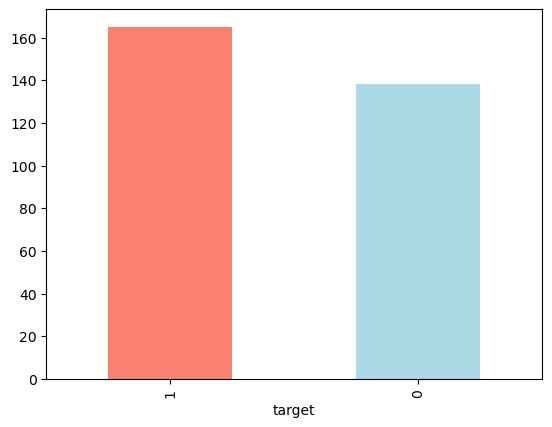

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

df.info()

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

## Heart Disease Frequency according to Sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

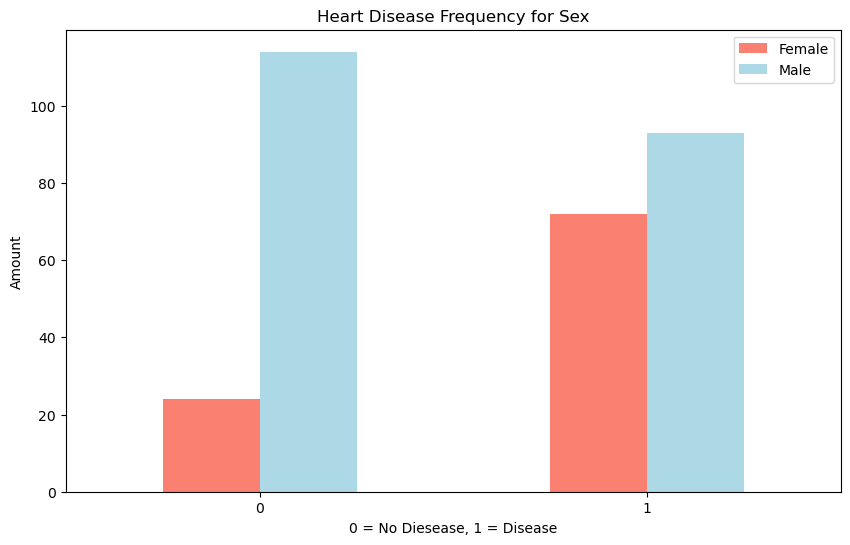

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex) .plot(kind="bar",
                                     figsize=(10, 6),
                                     color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

## Age vs. Max Heart Rate for Heart Disease

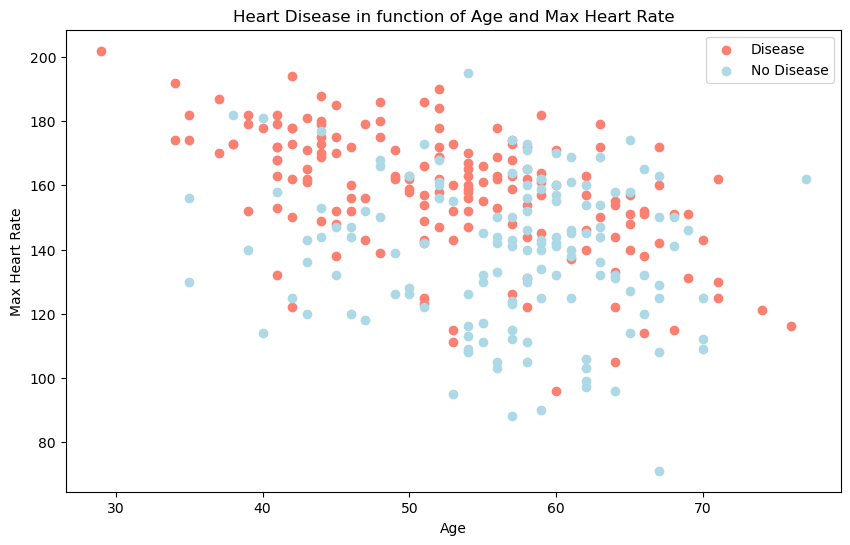

In [12]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

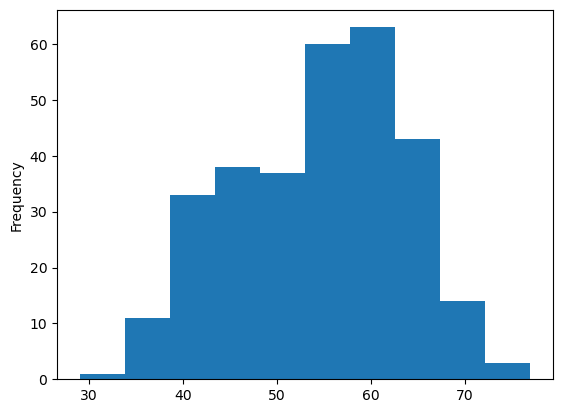

In [13]:
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type

In [14]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

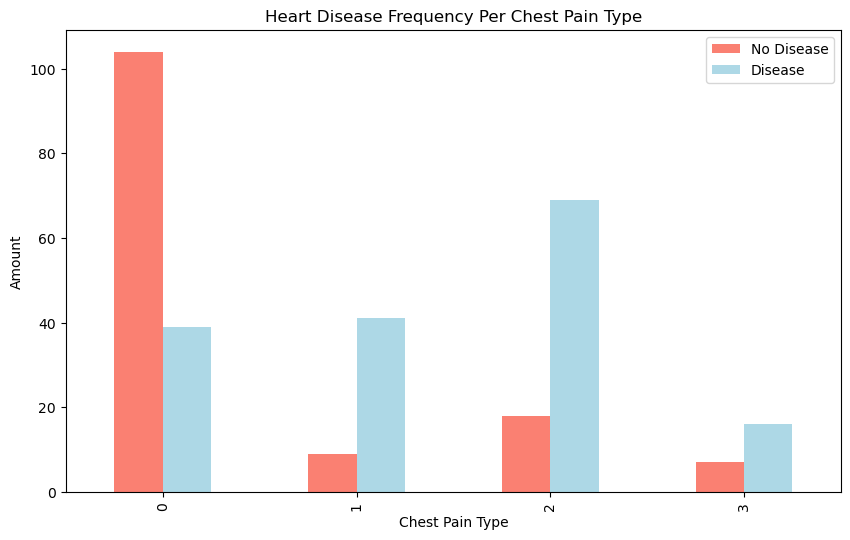

In [15]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);

In [16]:
# Make a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

(14.5, -0.5)

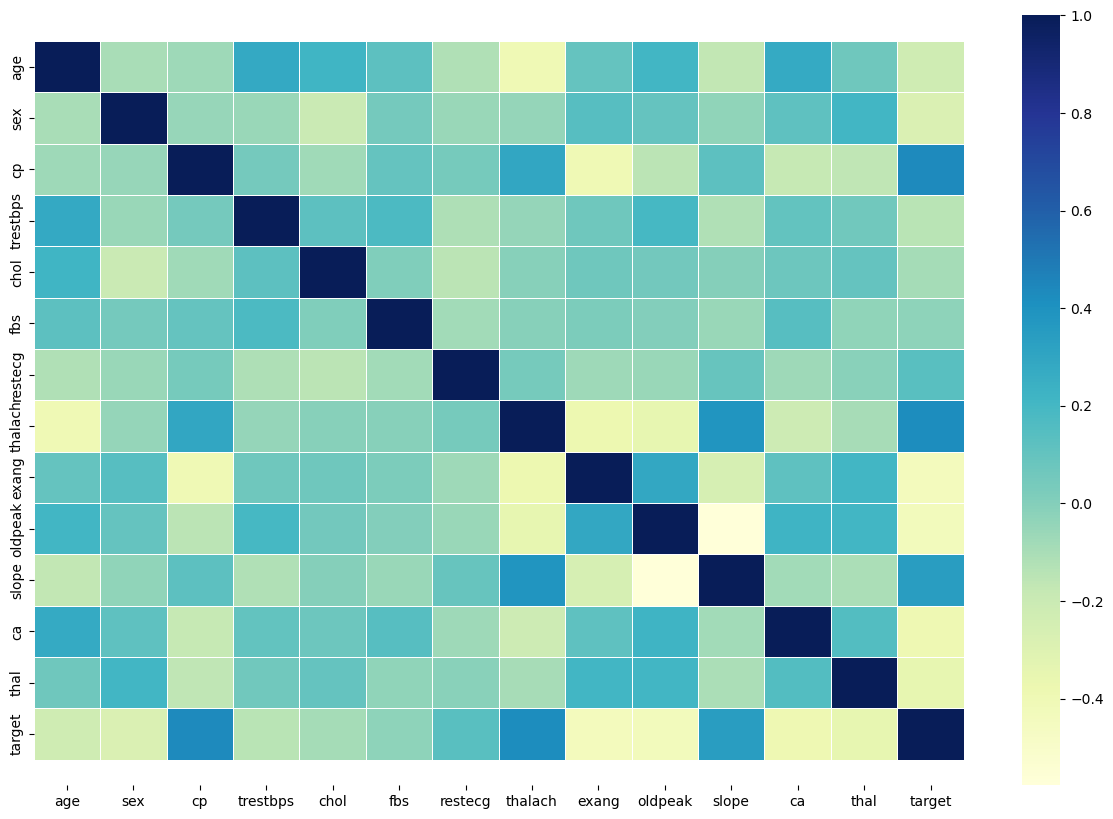

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 #annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5.Modelling

In [18]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [19]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [20]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# Split into training and test

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [23]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

In [24]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Data are splited lets build machine learning model

Will try 3 different model
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [25]:
# Put models in a dictionary
models = { "Logistic Regeression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
}

# Create a function  to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_testing: testing data (no labels)
    y_training: testing labels
    y_test: testing labels
    """
    model_scores ={}
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and append its scores to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores   

In [26]:
model_scores = fit_and_score(models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regeression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Model Comparison

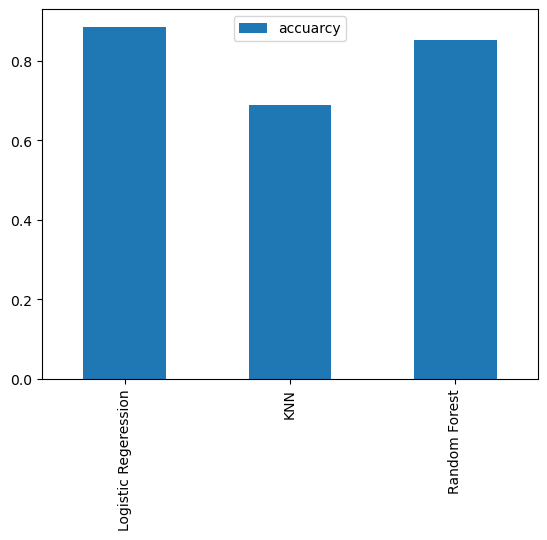

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuarcy"])
model_compare.T.plot.bar();

### Hyperparameter tuning

In [28]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup  KNN insatnce
knn = KNeighborsClassifier()

# Loop throught different n_neighbous
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the train_scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test_scores list
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN scores on the test data: 75.41%


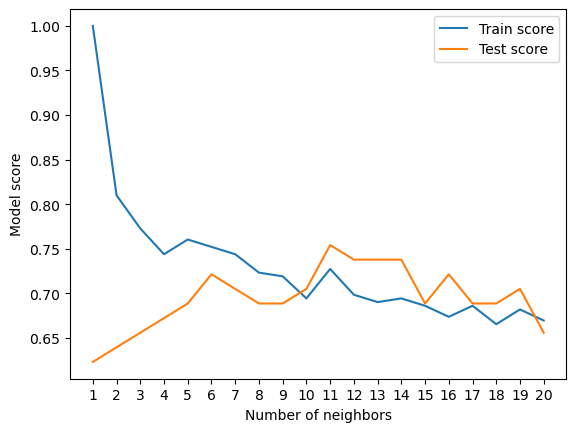

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN scores on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

Tuning      
 * LogisticRegression()
 * RandomForestClassifier()      
...using RandomizedSearchCV

In [32]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter gird for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Let's tune model using RandomizedSearchCV

In [33]:
# Tune LogisticRegression

np.random.seed(42)

# Set up hyperparameter search for LogisticRegression
rs_log_reg  = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Lets tune RandomForestClassifier()

In [36]:
# Tune RandomForestClassifier

np.random.seed(42)

# Set up hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparamter Tuning with GridSearchCV
Lets improve the LogisticRegression using GridSearchCV

In [39]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver":["liblinear"] 
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit gird hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluting tuned machine learning classifier, beyond accuarcy
* Roc Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [42]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

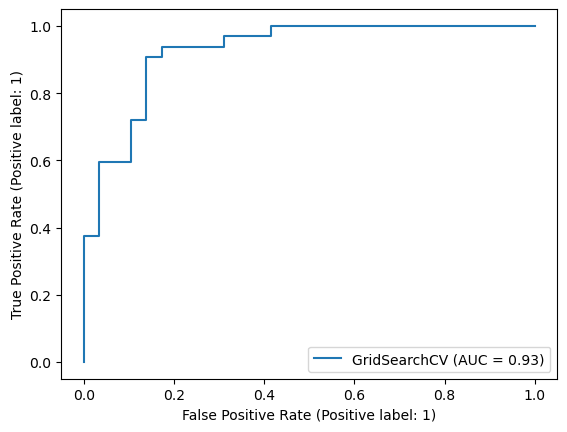

In [45]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [46]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


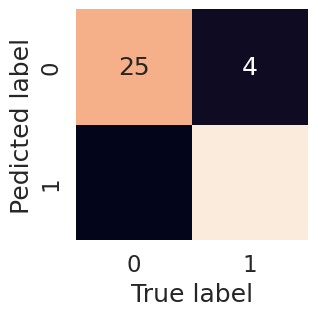

In [47]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatap()
    """
    fig, ax  = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Pedicted label")

    
plot_conf_mat(y_test, y_preds)    

Let's get a classification report, cross-validated precision, recall, f1-score

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation 

In [49]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [51]:
# Cross-validated accuarcy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [52]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [53]:
cv_precision = cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [54]:
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [55]:
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

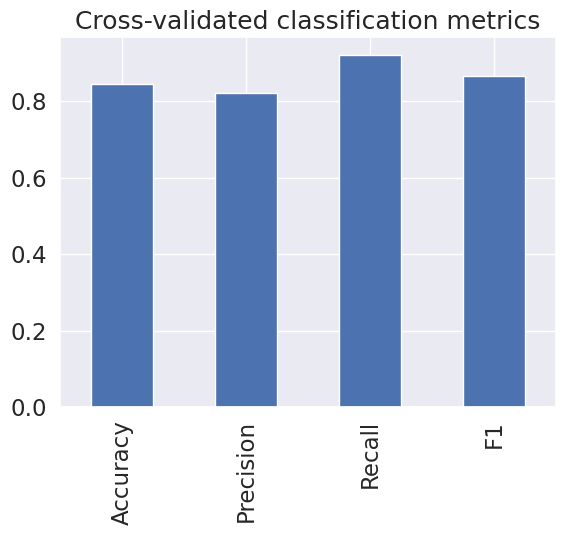

In [56]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feautre Importance

Feature importance is another as asking "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for  "(MODEL NAME) feature importance" 

In [57]:
# Fit an instance of LogisticRegeression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [58]:
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

In [59]:
# Match coef's feature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672715846030935,
 'sex': -0.8604457571727641,
 'cp': 0.6606707429832999,
 'trestbps': -0.011569931252544003,
 'chol': -0.0016637408611369841,
 'fbs': 0.04386132427617729,
 'restecg': 0.3127578230667477,
 'thalach': 0.024593607391386427,
 'exang': -0.6041303464142003,
 'oldpeak': -0.5686285482723883,
 'slope': 0.4505161474321694,
 'ca': -0.6360986111170053,
 'thal': -0.6766337550845071}

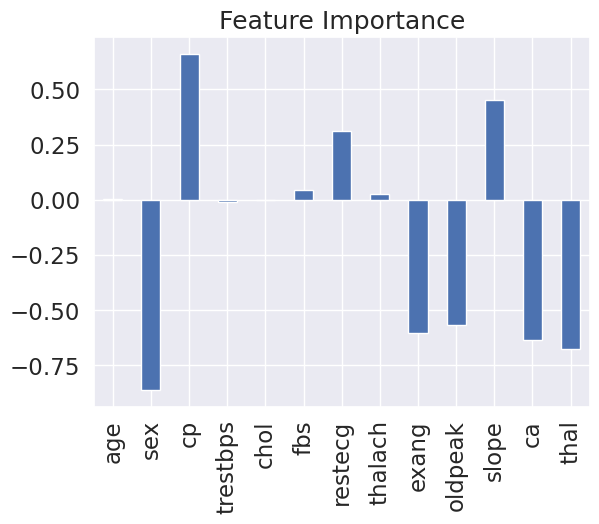

In [60]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [61]:
pd.crosstab(df["sex"], df["target"])

target    0   1
sex            
0        24  72
1       114  93

In [62]:
pd.crosstab(df["slope"], df["target"])

target   0    1
slope          
0       12    9
1       91   49
2       35  107

# 6.Experimentation

* Could we try a better model? Like CatBoost or XGBoost

In [63]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [64]:
models = {"CatBoostClassifier": CatBoostClassifier(),
          "XGBClassifier": XGBClassifier()} 

In [65]:
model_scores = fit_and_score(models, 
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 51.1ms	remaining: 51.1s
1:	learn: 0.6846994	total: 52.1ms	remaining: 26s
2:	learn: 0.6804470	total: 53ms	remaining: 17.6s
3:	learn: 0.6762242	total: 53.7ms	remaining: 13.4s
4:	learn: 0.6716784	total: 54.5ms	remaining: 10.8s
5:	learn: 0.6672808	total: 55.3ms	remaining: 9.16s
6:	learn: 0.6639958	total: 56ms	remaining: 7.95s
7:	learn: 0.6601980	total: 56.8ms	remaining: 7.04s
8:	learn: 0.6563766	total: 57.4ms	remaining: 6.32s
9:	learn: 0.6525103	total: 58.2ms	remaining: 5.76s
10:	learn: 0.6483670	total: 58.8ms	remaining: 5.29s
11:	learn: 0.6448827	total: 59.6ms	remaining: 4.91s
12:	learn: 0.6412767	total: 60.4ms	remaining: 4.58s
13:	learn: 0.6374286	total: 61.1ms	remaining: 4.3s
14:	learn: 0.6335427	total: 62.2ms	remaining: 4.08s
15:	learn: 0.6288052	total: 63ms	remaining: 3.87s
16:	learn: 0.6250489	total: 63.9ms	remaining: 3.7s
17:	learn: 0.6209495	total: 64.8ms	remaining: 3.53s
18:	learn: 0.6181899	total: 65.5ms	remaining: 3.38s
19

/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a f

{'CatBoostClassifier': 0.8360655737704918, 'XGBClassifier': 0.819672131147541}

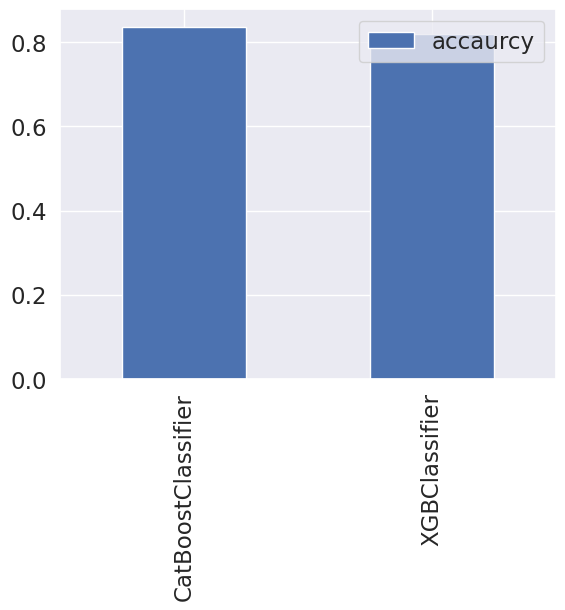

In [66]:
model_compare = pd.DataFrame(model_scores, index=["accaurcy"])
model_compare.T.plot.bar();

In [67]:
# Create a hyperparameter grid for CatBoostClassifier
cat_boost_grid = {"n_estimators": np.arange(10, 1000, 50),
                  "max_depth": np.arange(1, 10, 2),
                  "l2_leaf_reg"  : np.arange(2, 10, 2)       
                 }
# Create a hyperparameter grid for XGBClassifier
cgb_grid = {"n_estimators": np.arange(1, 15, 2),
            "learning_rate": [0.1, 0.01, 0.001, 0.0001],
            "subsample": [0.5, 0.7, 1, 1.3]
           }

In [68]:
# Tune CatBoostClassifier
np.random.seed(42)

# Setup hyperparameter search for CatBoostClassifier
rs_cat_boost_classifier = RandomizedSearchCV(CatBoostClassifier(),
                                            param_distributions=cat_boost_grid,
                                            cv=5,
                                            n_iter=20,
                                            verbose=True)
# Fit random hyperparameter search for CatBoostClassifier
rs_cat_boost_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0:	learn: 0.6845432	total: 490us	remaining: 225ms
1:	learn: 0.6760748	total: 856us	remaining: 196ms
2:	learn: 0.6681177	total: 1.19ms	remaining: 182ms
3:	learn: 0.6602766	total: 1.53ms	remaining: 174ms
4:	learn: 0.6529232	total: 1.85ms	remaining: 169ms
5:	learn: 0.6456718	total: 2.19ms	remaining: 166ms
6:	learn: 0.6377881	total: 2.52ms	remaining: 163ms
7:	learn: 0.6303964	total: 2.85ms	remaining: 161ms
8:	learn: 0.6269851	total: 3.2ms	remaining: 160ms
9:	learn: 0.6205470	total: 3.53ms	remaining: 159ms
10:	learn: 0.6140876	total: 3.88ms	remaining: 158ms
11:	learn: 0.6081335	total: 4.21ms	remaining: 157ms
12:	learn: 0.6026599	total: 4.54ms	remaining: 156ms
13:	learn: 0.5963267	total: 4.88ms	remaining: 155ms
14:	learn: 0.5921975	total: 5.21ms	remaining: 154ms
15:	learn: 0.5869049	total: 5.54ms	remaining: 154ms
16:	learn: 0.5811664	total: 5.88ms	remaining: 153ms
17:	learn: 0.5762666	total: 6.21ms	remaining: 153ms
18:	learn: 0.57

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fac4750f4c0>,
                   n_iter=20,
                   param_distributions={'l2_leaf_reg': array([2, 4, 6, 8]),
                                        'max_depth': array([1, 3, 5, 7, 9]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [69]:
rs_cat_boost_classifier.best_params_

{'n_estimators': 110, 'max_depth': 5, 'l2_leaf_reg': 2}

In [70]:
rs_cat_boost_classifier.score(X_test, y_test)

0.8688524590163934

In [71]:
# Tune XGBClassifier
np.random.seed(42)

# Setup hyperparameter search for XGBClassifier
xgb_classifier = RandomizedSearchCV(XGBClassifier(),
                                    param_distributions=cgb_grid,
                                    cv=5,
                                    n_iter=20,
                                    verbose=True)
# Fit random hyperparameter search for XGBClassifier
xgb_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a f

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001,
                                                          0.0001],
                                        'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'subsample': [0.5, 0.7, 1, 1.3]},
                   verbose=True)

In [72]:
xgb_classifier.best_params_

{'subsample': 0.5, 'n_estimators': 9, 'learning_rate': 0.01}

In [73]:
xgb_classifier.score(X_test, y_test)

/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/developer/Desktop/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a f

0.8524590163934426

### Hyperparamter Tuning with GridSearchCV

In [89]:
cat_boost_classifier_grid = {"n_estimators": [80, 90, 100, 110, 120],
                             "max_depth": [6, 7, 8],
                             "l2_leaf_reg": [2]}

cat_boost_classifier = GridSearchCV(estimator=CatBoostClassifier(),
                                    param_grid=cat_boost_classifier_grid,
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True)
cat_boost_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
68:	learn: 0.3848766	total: 753ms	remaining: 338ms
69:	learn: 0.3831276	total: 755ms	remaining: 324ms
70:	learn: 0.3797609	total: 756ms	remaining: 309ms
71:	learn: 0.3782212	total: 762ms	remaining: 296ms
72:	learn: 0.3760461	total: 764ms	remaining: 283ms
73:	learn: 0.3737382	total: 767ms	remaining: 270ms
74:	learn: 0.3713748	total: 772ms	remaining: 257ms
75:	learn: 0.3695496	total: 774ms	remaining: 244ms
76:	learn: 0.3674544	total: 779ms	remaining: 233ms
77:	learn: 0.3651832	total: 782ms	remaining: 221ms
78:	learn: 0.3629830	total: 783ms	remaining: 208ms
79:	learn: 0.3611416	total: 786ms	remaining: 197ms
80:	learn: 0.3586154	total: 789ms	remaining: 185ms
81:	learn: 0.3568828	total: 793ms	remaining: 174ms
82:	learn: 0.3551703	total: 796ms	remaining: 163ms
83:	learn: 0.3531577	total: 797ms	remaining: 152ms
84:	learn: 0.3516709	total: 799ms	remaining: 141ms
85:	learn: 0.3493866	total: 802ms	remaining: 131ms
86:	learn: 0.3479749	

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fac46a147c0>,
             n_jobs=-1,
             param_grid={'l2_leaf_reg': [2], 'max_depth': [6, 7, 8],
                         'n_estimators': [80, 90, 100, 110, 120]},
             verbose=True)

In [90]:
cat_boost_classifier.best_params_

{'l2_leaf_reg': 2, 'max_depth': 6, 'n_estimators': 100}

In [91]:
cat_boost_classifier.score(X_test, y_test)

0.8852459016393442

#### Form Testing the CatBoostCalssifier cant get a score higher than LogisticRegeression, but can get a score same as LogisticRegeression.

#### Calculate evaluation metrics using cross-validation

In [94]:
cat_boost_classifier = CatBoostClassifier(n_estimators=100,
                                          max_depth=6,
                                          l2_leaf_reg=2)

In [96]:
cv_acc = cross_val_score(cat_boost_classifier,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0:	learn: 0.6827767	total: 974us	remaining: 96.5ms
1:	learn: 0.6737861	total: 1.83ms	remaining: 89.8ms
2:	learn: 0.6640304	total: 2.46ms	remaining: 79.7ms
3:	learn: 0.6555523	total: 3.16ms	remaining: 75.9ms
4:	learn: 0.6469261	total: 3.82ms	remaining: 72.5ms
5:	learn: 0.6390252	total: 4.46ms	remaining: 69.9ms
6:	learn: 0.6304272	total: 5.39ms	remaining: 71.7ms
7:	learn: 0.6235078	total: 5.96ms	remaining: 68.6ms
8:	learn: 0.6161642	total: 6.37ms	remaining: 64.5ms
9:	learn: 0.6087434	total: 6.75ms	remaining: 60.8ms
10:	learn: 0.6032772	total: 7.14ms	remaining: 57.8ms
11:	learn: 0.5970665	total: 7.79ms	remaining: 57.1ms
12:	learn: 0.5905174	total: 8.4ms	remaining: 56.2ms
13:	learn: 0.5833248	total: 8.67ms	remaining: 53.3ms
14:	learn: 0.5765300	total: 9.22ms	remaining: 52.2ms
15:	learn: 0.5704156	total: 9.61ms	remaining: 50.4ms
16:	learn: 0.5643826	total: 9.99ms	remaining: 48.8ms
17:	learn: 0.5586630	total: 10.4ms	remaining: 47.2ms
18:	learn: 0.5525778	total: 10.7ms	remaining: 45.6ms
19:	l

0.8380874316939891

In [98]:
cv_precision = cross_val_score(cat_boost_classifier,
                                X,
                                y,
                                cv=5,
                                scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0:	learn: 0.6827767	total: 702us	remaining: 69.5ms
1:	learn: 0.6737861	total: 1.54ms	remaining: 75.4ms
2:	learn: 0.6640304	total: 2.1ms	remaining: 68ms
3:	learn: 0.6555523	total: 2.68ms	remaining: 64.2ms
4:	learn: 0.6469261	total: 3.23ms	remaining: 61.5ms
5:	learn: 0.6390252	total: 3.81ms	remaining: 59.7ms
6:	learn: 0.6304272	total: 4.37ms	remaining: 58ms
7:	learn: 0.6235078	total: 4.99ms	remaining: 57.4ms
8:	learn: 0.6161642	total: 5.56ms	remaining: 56.2ms
9:	learn: 0.6087434	total: 6.11ms	remaining: 55ms
10:	learn: 0.6032772	total: 6.62ms	remaining: 53.6ms
11:	learn: 0.5970665	total: 7.18ms	remaining: 52.7ms
12:	learn: 0.5905174	total: 7.67ms	remaining: 51.4ms
13:	learn: 0.5833248	total: 7.94ms	remaining: 48.8ms
14:	learn: 0.5765300	total: 8.47ms	remaining: 48ms
15:	learn: 0.5704156	total: 8.98ms	remaining: 47.2ms
16:	learn: 0.5643826	total: 9.5ms	remaining: 46.4ms
17:	learn: 0.5586630	total: 9.99ms	remaining: 45.5ms
18:	learn: 0.5525778	total: 10.5ms	remaining: 44.6ms
19:	learn: 0.5

0.8379076271360052

In [99]:
cv_recall = cross_val_score(cat_boost_classifier,
                                X,
                                y,
                                cv=5,
                                scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0:	learn: 0.6827767	total: 767us	remaining: 76ms
1:	learn: 0.6737861	total: 1.74ms	remaining: 85.1ms
2:	learn: 0.6640304	total: 2.45ms	remaining: 79.4ms
3:	learn: 0.6555523	total: 3.14ms	remaining: 75.3ms
4:	learn: 0.6469261	total: 3.85ms	remaining: 73.1ms
5:	learn: 0.6390252	total: 4.6ms	remaining: 72.1ms
6:	learn: 0.6304272	total: 5.18ms	remaining: 68.9ms
7:	learn: 0.6235078	total: 6.22ms	remaining: 71.6ms
8:	learn: 0.6161642	total: 6.79ms	remaining: 68.6ms
9:	learn: 0.6087434	total: 7.38ms	remaining: 66.4ms
10:	learn: 0.6032772	total: 8.14ms	remaining: 65.9ms
11:	learn: 0.5970665	total: 8.74ms	remaining: 64.1ms
12:	learn: 0.5905174	total: 9.33ms	remaining: 62.5ms
13:	learn: 0.5833248	total: 9.62ms	remaining: 59.1ms
14:	learn: 0.5765300	total: 10.2ms	remaining: 57.5ms
15:	learn: 0.5704156	total: 10.6ms	remaining: 55.7ms
16:	learn: 0.5643826	total: 11.1ms	remaining: 54.3ms
17:	learn: 0.5586630	total: 11.6ms	remaining: 53ms
18:	learn: 0.5525778	total: 12.4ms	remaining: 52.7ms
19:	learn

0.8787878787878789

In [100]:
cv_f1 = cross_val_score(cat_boost_classifier,
                                X,
                                y,
                                cv=5,
                                scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0:	learn: 0.6827767	total: 763us	remaining: 75.6ms
1:	learn: 0.6737861	total: 1.81ms	remaining: 88.6ms
2:	learn: 0.6640304	total: 2.46ms	remaining: 79.6ms
3:	learn: 0.6555523	total: 3.13ms	remaining: 75.2ms
4:	learn: 0.6469261	total: 3.75ms	remaining: 71.2ms
5:	learn: 0.6390252	total: 4.41ms	remaining: 69ms
6:	learn: 0.6304272	total: 5.04ms	remaining: 67ms
7:	learn: 0.6235078	total: 5.59ms	remaining: 64.3ms
8:	learn: 0.6161642	total: 6.14ms	remaining: 62.1ms
9:	learn: 0.6087434	total: 6.64ms	remaining: 59.8ms
10:	learn: 0.6032772	total: 7.2ms	remaining: 58.3ms
11:	learn: 0.5970665	total: 7.73ms	remaining: 56.7ms
12:	learn: 0.5905174	total: 8.62ms	remaining: 57.7ms
13:	learn: 0.5833248	total: 8.91ms	remaining: 54.7ms
14:	learn: 0.5765300	total: 9.46ms	remaining: 53.6ms
15:	learn: 0.5704156	total: 10ms	remaining: 52.5ms
16:	learn: 0.5643826	total: 10.5ms	remaining: 51.3ms
17:	learn: 0.5586630	total: 11ms	remaining: 50.1ms
18:	learn: 0.5525778	total: 11.5ms	remaining: 49.2ms
19:	learn: 0.

0.8561048652548022